In [45]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

path = '/Users/tengyaolong/Desktop/Anaconda stuff/Learning/winequality-red.csv'

data = pd.read_csv(path, sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
X = data.drop('quality', axis=1)
y = data['quality']

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [49]:
gnb = GaussianNB()
X = preprocessing.StandardScaler().fit(X).transform(X)
model = gnb.fit(X, y)
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
print(confusion_matrix(y, y_pred).trace())


[[  3   2   4   1   0   0]
 [  1   8  29  13   1   1]
 [  4  26 456 171  24   0]
 [  0  19 185 318 111   5]
 [  0   1  12  74 110   2]
 [  0   0   0   5  11   2]]
897


[712]
[712, 816]
[712, 816, 903]
[712, 816, 903, 893]
[712, 816, 903, 893, 904]
[712, 816, 903, 893, 904, 920]
[712, 816, 903, 893, 904, 920, 930]
[712, 816, 903, 893, 904, 920, 930, 927]
[712, 816, 903, 893, 904, 920, 930, 927, 937]


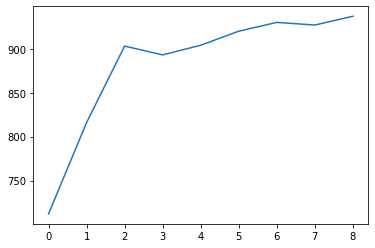

In [50]:
predicted_correct = []
for i in range(1, 10):
    X = preprocessing.StandardScaler().fit(X).transform(X)
    model = PCA(n_components=i)
    results = model.fit(X)
    z = results.transform(X)
    fit = gnb.fit(z, y)
    z_pred = fit.predict(z)
    predicted_correct.append(confusion_matrix(y, z_pred).trace())
    print(predicted_correct)
plt.plot(predicted_correct)
plt.show()

1
2
3
4
5
